## GANs
Base implementations: 
- https://github.com/wiseodd/generative-models/blob/master/GAN/vanilla_gan/gan_pytorch.py
- https://github.com/znxlwm/pytorch-MNIST-CelebA-GAN-DCGAN/blob/master/pytorch_MNIST_DCGAN.py
- https://github.com/pytorch/examples/blob/master/dcgan/main.py

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### MNIST-DCGAN

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.autograd import Variable
from utils import get_data_loaders, plot_grid

In [3]:
batch_size = 128
z_dim = 64
x_dim = 784
h_dim = 200
lr = 0.001
use_cuda = torch.cuda.is_available()
print('use_cuda: {}'.format(use_cuda))

use_cuda: True


In [6]:
train_loader, test_loader = get_data_loaders('cifar10', batch_size=batch_size, use_cuda=use_cuda)

Files already downloaded and verified


In [59]:
D = nn.Sequential(nn.Linear(x_dim, h_dim),
                 nn.ReLU(),
                 nn.Linear(h_dim, 1),
                 nn.Sigmoid())

In [60]:
G = nn.Sequential(nn.Linear(z_dim, h_dim),
                 nn.ReLU(),
                 nn.Linear(h_dim, x_dim),
                 nn.Sigmoid())

In [ ]:
G = nn.Sequential(nn.Linear(z_dim, ))

In [61]:
criterion = nn.BCELoss()
ones_label = Variable(torch.ones(batch_size, 1))
zeros_label = Variable(torch.zeros(batch_size, 1))
if use_cuda:
    ones_label = ones_label.cuda()
    zeros_label = zeros_label.cuda()
    D.cuda()
    G.cuda()

In [62]:
D_opt = optim.Adam(D.parameters(), lr=lr)
G_opt = optim.Adam(G.parameters(), lr=lr)

In [63]:
def train_epoch():
    for i, (x, y) in enumerate(train_loader):
        x = x.view(-1, x_dim)
        if use_cuda:
            x = x.cuda()
        # train D: maximizing log(D(x)) + log(1 - D(G(z)))
        z = torch.randn(batch_size, z_dim)
        if use_cuda:
            z = z.cuda()
        G_sample = G(z)
        D_real = D(x)
        D_fake = D(G_sample)
        D_loss_real = criterion(D_real, ones_label)
        D_loss_fake = criterion(D_fake, zeros_label)
        D_loss = D_loss_real + D_loss_fake
        D_loss.backward()   # add detach to G?
        D_opt.step()
        D.zero_grad()
        G.zero_grad()
        # train G: maximizing maximize log(D(G(z)))
        z = torch.randn(batch_size, z_dim)
        if use_cuda:
            z = z.cuda()
        G_sample = G(z)
        D_fake = D(G_sample)
        G_loss = criterion(D_fake, ones_label)
        G_loss.backward()
        G_opt.step()
        D.zero_grad()
        G.zero_grad()

In [64]:
G.training = True
D.training = True

In [262]:
%time train_epoch()

CPU times: user 5.46 s, sys: 53.4 ms, total: 5.51 s
Wall time: 5.54 s


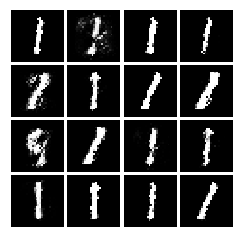

In [267]:
z = torch.randn(batch_size, z_dim).cuda()
samples = G(z).data.cpu().numpy()[:16]
plot_grid(samples, num=4, img_size=(28, 28))